In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\tanve\Downloads\train.csv")
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [3]:
df.shape

(800, 22)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [6]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [7]:
df['age'] = df['age'].astype(int)
df['age']

0      38
1      47
2       7
3      23
4      43
       ..
795    16
796    20
797     5
798    16
799    46
Name: age, Length: 800, dtype: int32

In [8]:
for col in df.columns:
    numerical_features = ['ID','age','result']
    if col not in numerical_features:
        print(col,df[col].unique())
        print('-'*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [9]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [10]:
df = df.drop(['ID', 'age_desc'],axis = 1)

In [11]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [12]:
mapping = {
    'Viet Nam':"VietNam",
    'Hong Kong':'China',
    'AmericanSamoa':'United States'}
    

In [13]:
df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [14]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [15]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [16]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


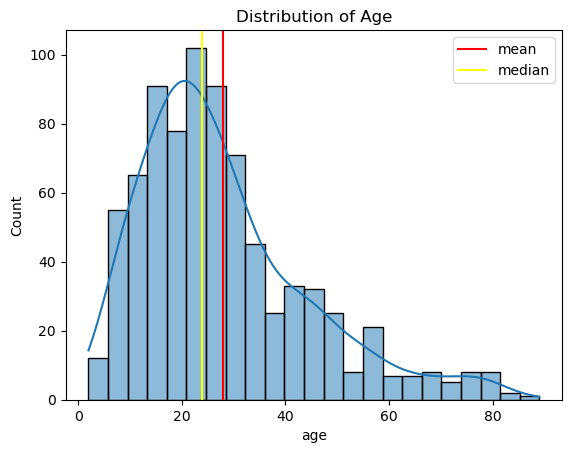

In [17]:
sns.histplot(df['age'],kde=True)
plt.title('Distribution of Age')
age_mean=df['age'].mean()
age_median=df['age'].median()
plt.axvline(age_mean,color ='red',label='mean')
plt.axvline(age_median,color ='yellow',label='median')
plt.legend()
plt.show()

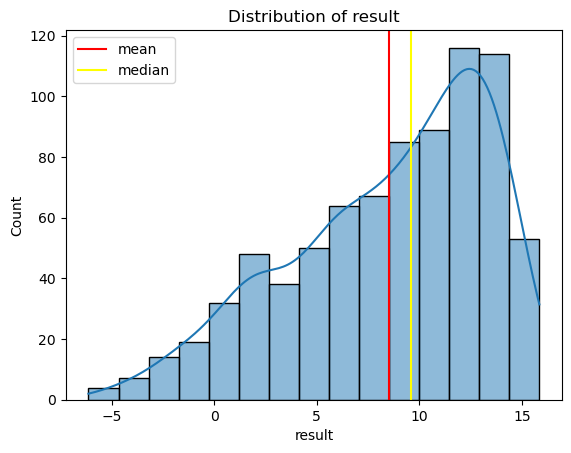

In [18]:
sns.histplot(df['result'],kde=True)
plt.title('Distribution of result')
result_mean=df['result'].mean()
result_median=df['result'].median()
plt.axvline(result_mean,color ='red',label='mean')
plt.axvline(result_median,color ='yellow',label='median')
plt.legend()
plt.show()

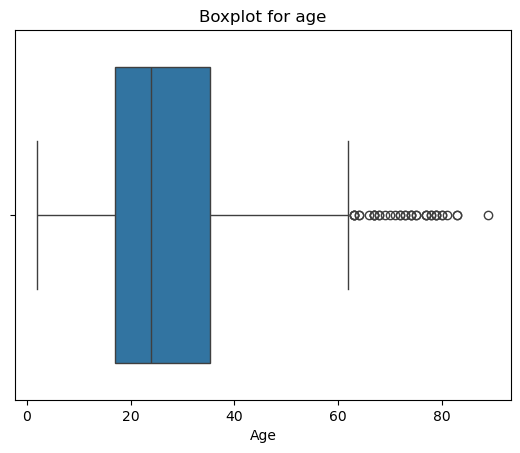

In [19]:
sns.boxplot(x=df['age'])
plt.title('Boxplot for age')
plt.xlabel('Age')
plt.show()

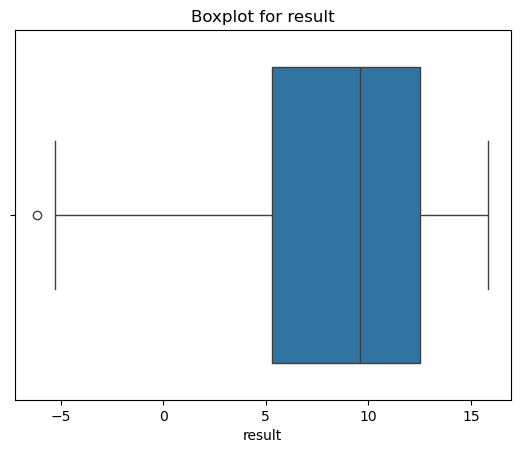

In [20]:
sns.boxplot(x=df['result'])
plt.title('Boxplot for result')
plt.xlabel('result')
plt.show()

In [21]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outlier = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
len(age_outlier)

39

In [22]:
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outlier = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]
len(result_outlier)

1

In [23]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

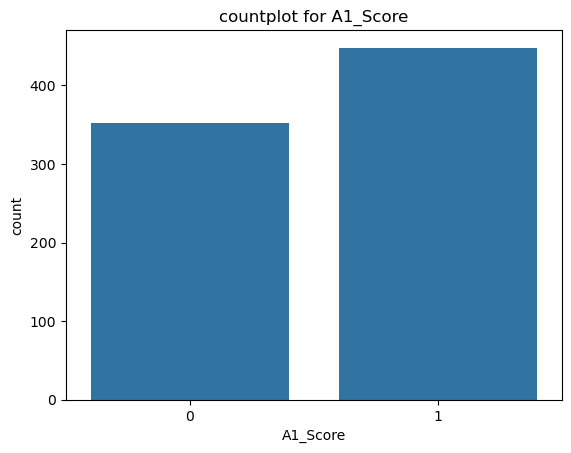

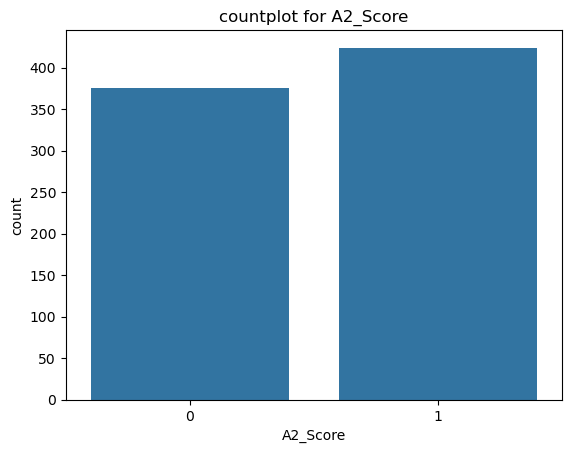

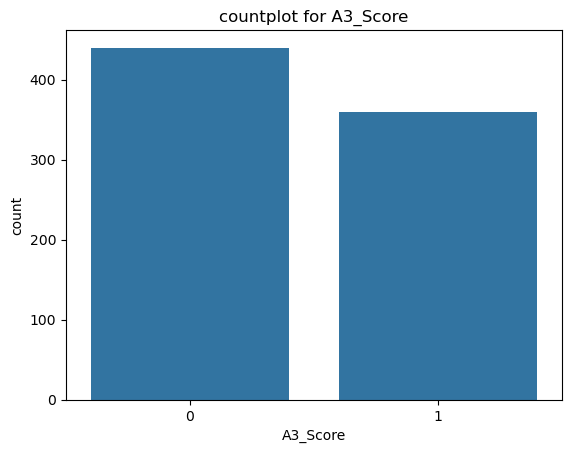

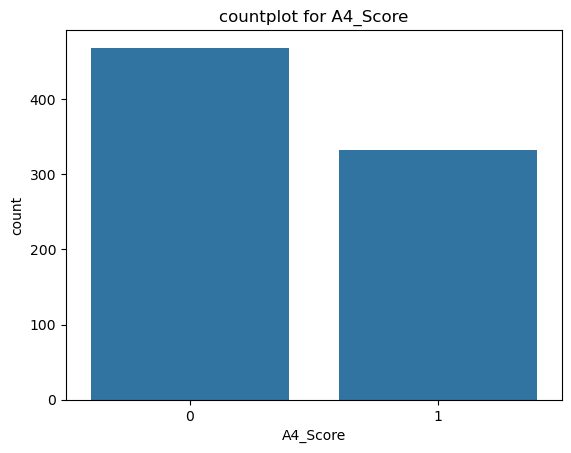

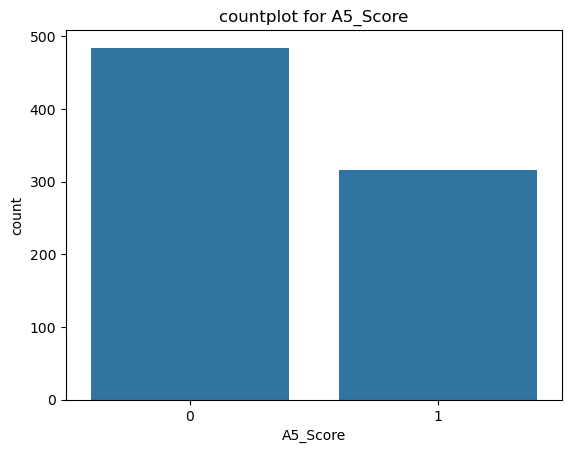

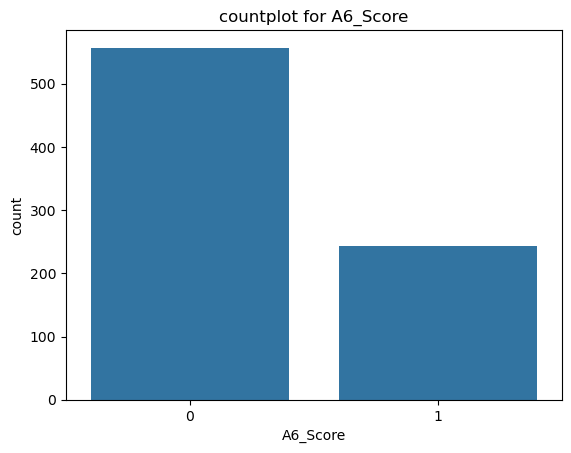

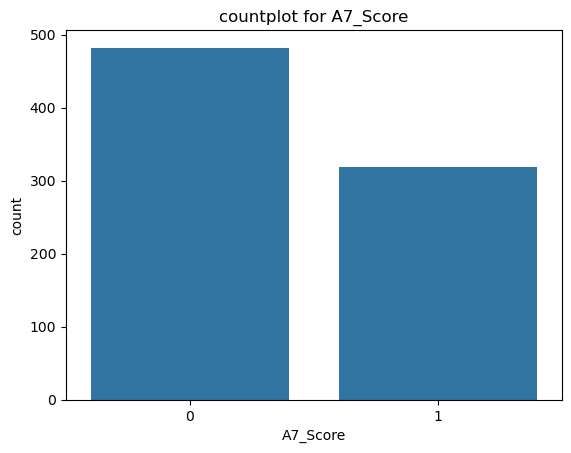

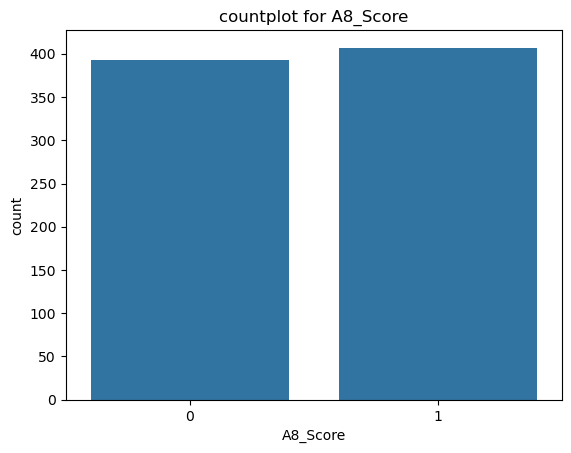

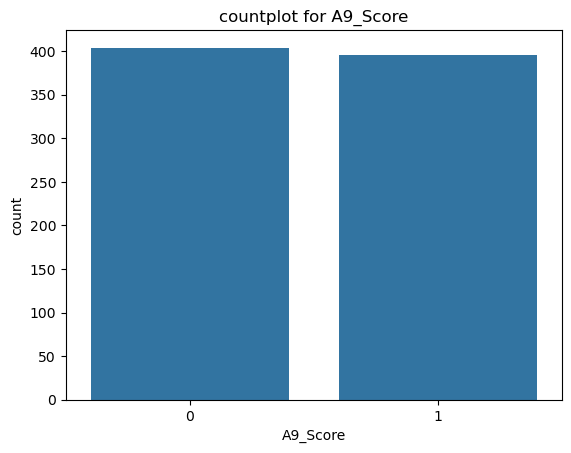

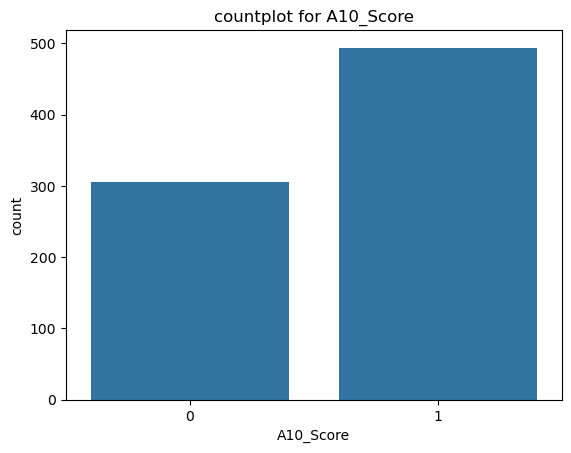

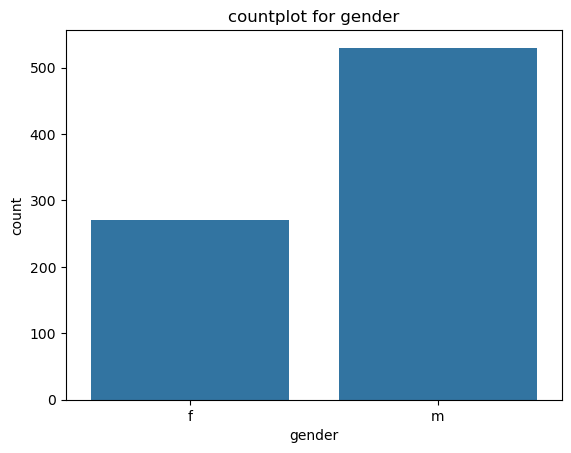

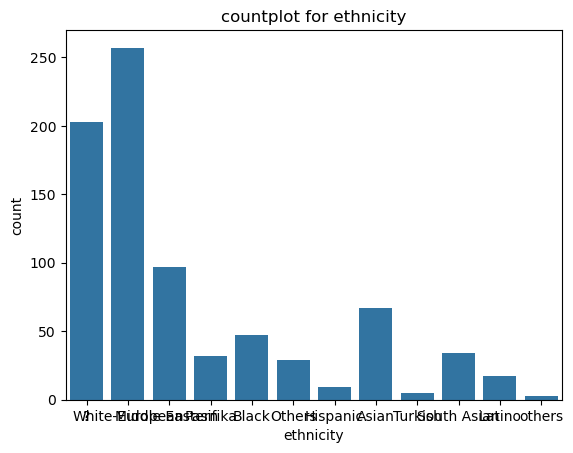

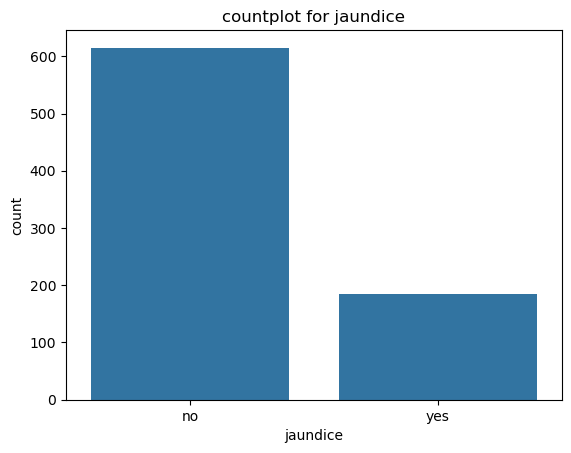

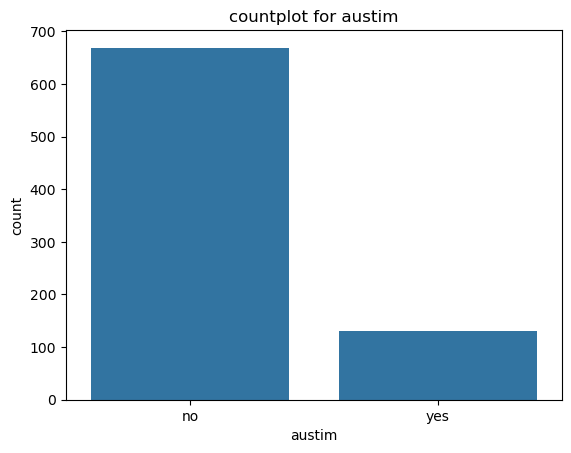

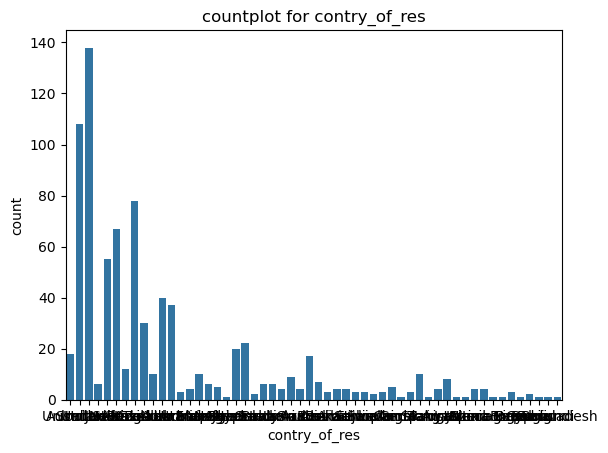

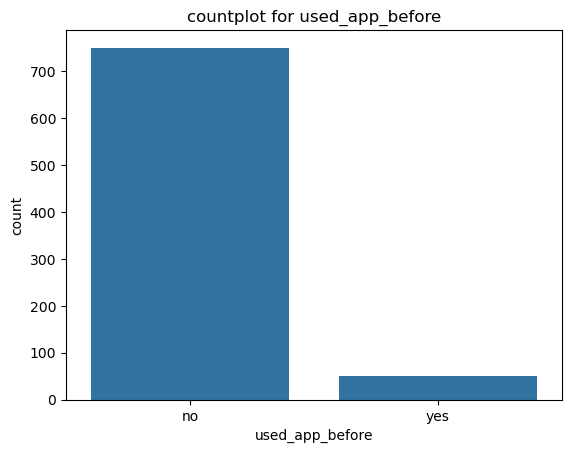

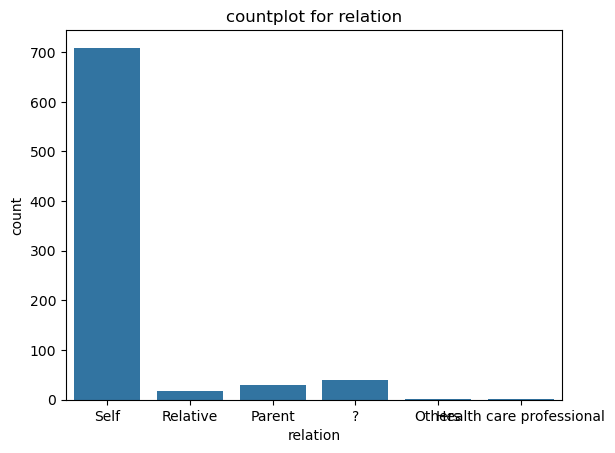

In [24]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation']

for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f'countplot for {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

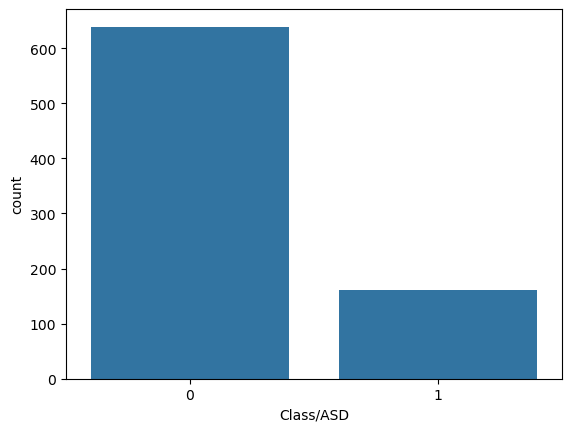

In [25]:
sns.countplot(x=df['Class/ASD'])
plt.show()

In [26]:
df['ethnicity']=df['ethnicity'].replace({'?':'Others','others':'Others'})

In [27]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64

In [28]:
df['relation']=df['relation'].replace({'?':'Others','Rative':'Others','Parent':'Others','Health care professional':'Others','Relative':'Others'})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    int32  
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

In [30]:
object_col = df.select_dtypes(include=['object']).columns

In [31]:
encoder={}

for column in object_col:
    label_encoder = LabelEncoder()
    df[column] =label_encoder.fit_transform(df[column])
    encoder[column] = label_encoder

In [32]:
with open('encoder.pkl','wb') as f:
    pickle.dump(encoder,f)

In [33]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


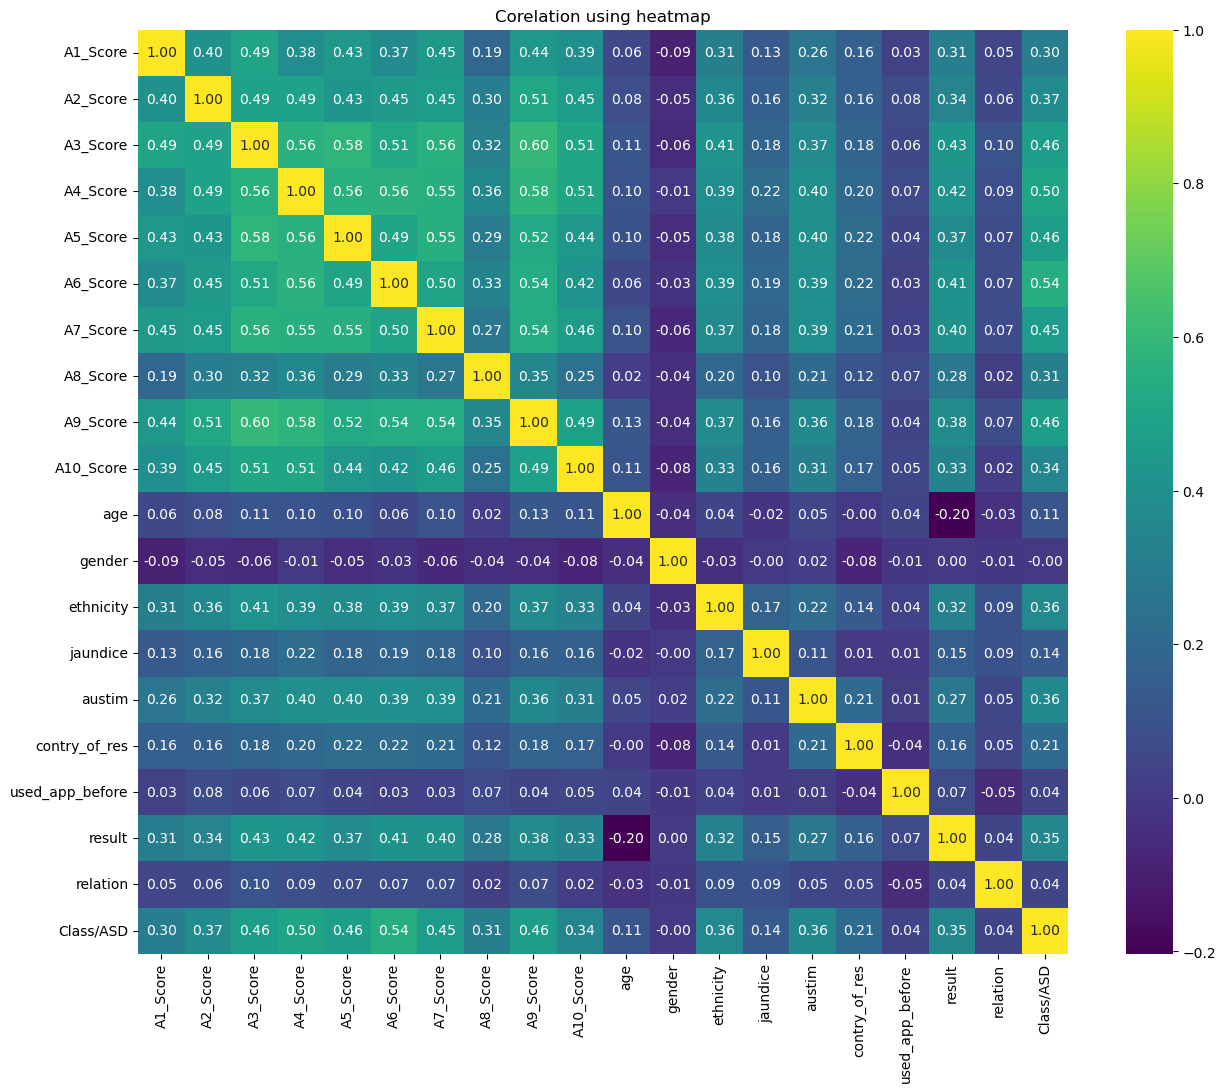

In [34]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt='.2f')
plt.title('Corelation using heatmap')
plt.show()

In [36]:
def replace_outlier_median(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median =df[column].median()

    df[column]=df[column].apply(lambda x:median if x < lower_bound or x > upper_bound else x)

    return df
    

In [38]:
df = replace_outlier_median(df,'age')
df = replace_outlier_median(df,'result')

In [44]:
df.shape

(800, 20)

In [46]:
X = df.drop(['Class/ASD'],axis = 1)
Y =df['Class/ASD']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [52]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [54]:
smote = SMOTE(random_state=42)

In [56]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

C:\Users\tanve\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tanve\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\tanve\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tanve\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\tanve\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [58]:
y_train_smote.shape

(1030,)

In [62]:
y_train_smote.value_counts()

Class/ASD
1    515
0    515
Name: count, dtype: int64

In [66]:
models ={
    'Decision_tree':DecisionTreeClassifier(),
    'Random_Forest':RandomForestClassifier(),
    'XGBboost':XGBClassifier()
}

In [70]:
cv_score = {}

for model_name,model in models.items():
    print(f'Training {model_name} with default parameters...')
    scores = cross_val_score(model,X_train_smote,y_train_smote,cv=5 ,scoring='accuracy')
    cv_score[model_name] = scores
    print(f'{model_name} Cross_validation_accuracy:{np.mean(scores):.2f}')
    print('_'*50)

Training Decision_tree with default parameters...
Decision_tree Cross_validation_accuracy:0.86
__________________________________________________
Training Random_Forest with default parameters...
Random_Forest Cross_validation_accuracy:0.92
__________________________________________________
Training XGBboost with default parameters...
XGBboost Cross_validation_accuracy:0.90
__________________________________________________


In [72]:
cv_score

{'Decision_tree': array([0.81067961, 0.86893204, 0.85436893, 0.88349515, 0.86407767]),
 'Random_Forest': array([0.91747573, 0.93203883, 0.91747573, 0.90291262, 0.90776699]),
 'XGBboost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

In [80]:
Decision_tree = DecisionTreeClassifier()
Random_Forest = RandomForestClassifier()
XGBboost = XGBClassifier()

In [86]:


param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}




In [90]:
random_search_dt = RandomizedSearchCV(estimator = Decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring='accuracy',random_state=42)
random_search_rf = RandomizedSearchCV(estimator = Random_Forest,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring='accuracy',random_state=42)
random_search_xgb = RandomizedSearchCV(estimator = XGBboost,param_distributions=param_grid_xgb,n_iter=20,cv=5,scoring='accuracy',random_state=42)

In [92]:
random_search_dt.fit(X_train_smote,y_train_smote)
random_search_rf.fit(X_train_smote,y_train_smote)
random_search_xgb.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [94]:
best_model = None
best_score = 0 

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

In [96]:
print(f'Best model: {best_model}')
print(f'Best cross_validation_Accuracy: {best_score:.2f}')

Best model: RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=50)
Best cross_validation_Accuracy: 0.93


In [98]:
with open('best_model.pkl','wb') as f:
    pickle.dump(best_model,f)

In [100]:
y_test_pred = best_model.predict(X_test)
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.8125
[[108  16]
 [ 14  22]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.58      0.61      0.59        36

    accuracy                           0.81       160
   macro avg       0.73      0.74      0.74       160
weighted avg       0.82      0.81      0.81       160

